In [3]:
from PIL import * 
from random import *
from scipy import misc
from os import listdir
import string as str
import matplotlib.pyplot as plt
import numpy as np

In [5]:
Dist="D:\\NU\\fall 2017\\CIT machine learning\\Assignment 1 Dataset\\"
trainFiles = [f for f in listdir(Dist+"Train\\")] #names of train files
testFiles = [f for f in listdir(Dist+"Test\\")]#names of test files

In [6]:
def classifierr():
    classifiers=[]
    for alpha in range (0,26):
        weight = np.array([1] + [0]*144)
        t=[]
        for i in range(0,182):
            t.append(-1)    
        for i in range (alpha*7,(alpha+1)*7):
            t[i]=1
        i=0
        while i < len(trainFiles):
            Xi = misc.imread(Dist+"Train\\" + trainFiles[i])
            Xi=Xi.reshape(144,)
            Xi=np.append(Xi,1)
            sca = np.dot(np.transpose(weight),((Xi)*t[i]))
            if (sca <0 ):
                weight = np.add(weight , 0.05 * Xi * t[i])
                i=0
            else :
                i=i+1
        classifiers.append(weight)
    return classifiers
classifiers=classifierr()


a8 is classified as  a
a9 is classified as  a
b8 is classified as  b
b9 is classified as  b
c8 is classified as  c
c9 is classified as  c
d8 is classified as  d
d9 is classified as  d
e8 is classified as  e
e9 is classified as  e
f8 is classified as  f
f9 is classified as  f
g8 is classified as  g
g9 is classified as  g
h8 is classified as  h
h9 is classified as  h
i8 is classified as  i
i9 is classified as  k
j8 is classified as  j
j9 is classified as  j
k8 is classified as  k
k9 is classified as  k
l8 is classified as  l
l9 is classified as  q
m8 is classified as  m
m9 is classified as  m
n8 is classified as  n
n9 is classified as  n
o8 is classified as  o
o9 is classified as  o
p8 is classified as  p
p9 is classified as  p
q8 is classified as  q
q9 is classified as  q
r8 is classified as  r
r9 is classified as  r
s8 is classified as  s
s9 is classified as  s
t8 is classified as  t
t9 is classified as  t
u8 is classified as  u
u9 is classified as  u
v8 is classified as  v
v9 is class

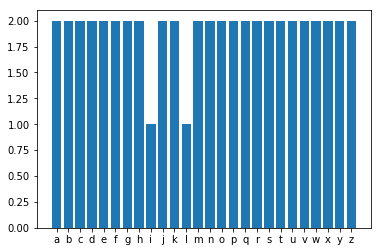

In [7]:
charcters=[]
dict={}
for char in str.ascii_lowercase:
    charcters.append(char)
    dict['%s'%char]=0
for i in range (0,len(testFiles)):
    arr=[]
    for alpha in range (0,26):
        img=misc.imread(Dist+"test\\"+ testFiles[i])
        img=img.reshape(144,)
        img=np.append(img,1)
        a=np.dot(np.transpose(classifiers[alpha]),(img))
        arr.append(a)
    max_value = max(arr) #max value of the array
    max_index = arr.index(max_value) #index of the max value, index of the weight vector with the heighst value result
    print (testFiles[i][2:4],"is classified as ",charcters[max_index])
    if (charcters[max_index]==testFiles[i][2]):
        dict['%s'%charcters[max_index]] = dict['%s'%charcters[max_index]]+1
correct=[]
for i in range(0,26):
    correct.append(dict['%s'%charcters[i]])
        
plt.bar(range(len(dict)), dict.values(), align='center')
plt.xticks(range(len(dict)), dict.keys())
plt.savefig(Dist+"accuracy.jpg")
plt.show()

